******Introduction******

The final project presented to our group is to Identify the best neighborhood to live in Pittsburgh. Using the Western Pa Regional Data Center and its numerous data sets. Our group has selected three data sets to narrow down the best neighborhood based off of quality of living. My partners have chosen to search by number of accessible green space and home value to identify the neighborhood. I have chosen a darker route, the data set that I have chosen is the arrest data of Pittsburgh from 2014-23. The arrest data contains the location of the arrest, so by searching by the location of the arrest we can determine what areas have the higher rate of arrests. Allowing for us to determine which area is the safest based of frequency of arrests.

Link to Data: https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f


In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

df = pd.read_csv("Pitt_Arrests.csv.csv")

df

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66480,88276,2064629,23140205,18.0,M,B,2023-11-04T00:49:00,"6600 Block Frankstown AV Pittsburgh, PA 15206",2702 Aggravated Assault. / 2705 Recklessy Enda...,"N Murtland ST Pittsburgh, PA 15208",Homewood North,3,1302.0,NaN,NaN,NaN,NaN
66481,88277,2064630,23146375,32.0,M,B,2023-09-14T23:44:00,"1000 Block Airport BL Pittsburgh, PA 15231",9501 Bench Warrant,"1000 Block Airport BL Pittsburgh, PA 15231",Outside City,OSC,5599.0,NaN,NaN,-80.255272,40.496059
66482,88300,2064640,22025579,58.0,F,B,2022-02-19T20:40:00,"2100 Block BROWNSVILLE RD PITTSBURGH, PA 15210",2701 Simple Assault. / 2706 Terroristic Threat...,"2100 Block Brownsville RD Pittsburgh, PA 15210",Carrick,3,2902.0,4.0,3.0,-79.986524,40.393200
66483,88333,2064660,14251296,26.0,F,B,2014-12-27T04:30:00,"2000 Block Eggers ST Pittsburgh, PA 15212",2701 Simple Assault. / 3304 Criminal Mischief....,"2000 Block Eggers ST Pittsburgh, PA 15212",Troy Hill,1,2406.0,NaN,NaN,NaN,NaN


This datset is great, so to insure that all neighborhoods of pittsburgh is accounted for. 
We run this code to chack and display all the neighborhoods in the dataset.

In [43]:
df['INCIDENTNEIGHBORHOOD'].unique()


array(['Bloomfield', 'Outside City', 'Westwood', 'East Allegheny',
       'Crafton Heights', 'Greenfield', 'Brookline', 'Regent Square',
       'East Liberty', nan, 'East Hills', 'Carrick', 'Allegheny Center',
       'South Side Flats', 'Sheraden', 'East Carnegie',
       'Golden Triangle/Civic Arena', 'Point Breeze North', 'Perry South',
       'Allentown', 'North Shore', 'Marshall-Shadeland',
       'Central Oakland', 'Middle Hill', 'Strip District',
       'Lincoln-Lemington-Belmar', 'Central Northside',
       'Troy Hill-Herrs Island', 'Highland Park', 'Homewood North',
       'Northview Heights', 'Brighton Heights', 'Hazelwood',
       'Perry North', 'Bedford Dwellings', 'Elliott', 'Beechview',
       'Fineview', 'Glen Hazel', 'Spring Hill-City View', 'Bluff',
       'Manchester', 'Homewood West', 'Outside County', 'Point Breeze',
       'Homewood South', 'Squirrel Hill South', 'Terrace Village',
       'Upper Lawrenceville', 'Arlington', 'South Side Slopes',
       'Lower Lawrenc

While this dataset is great, It has 66,000 rows of information. Which wouldn't be fun to manually search and
document which neighborhoods show up the most. So this program sorts through the dataset and counts the number of instances thats a neighborhood shows up. Documenting the number of arrest that happened in that neighborhood.

In [54]:
neighborhood_counter = dict()


for row, col in df.iterrows():
    neighborhood = col['INCIDENTNEIGHBORHOOD']
    
    # check to see if the center is already in the dictionary
    if neighborhood not in neighborhood_counter:
        # create a new entry
        neighborhood_counter[neighborhood] = 1
    else:
        # increment a new entry
        #center_counter[center] += 1
        neighborhood_counter[neighborhood] += 1

# Display the dictionary 
neighborhood_counter

{'Bloomfield': 984,
 'Outside City': 316,
 'Westwood': 226,
 'East Allegheny': 2217,
 'Crafton Heights': 601,
 'Greenfield': 537,
 'Brookline': 1390,
 'Regent Square': 37,
 'East Liberty': 1889,
 nan: 2489,
 'East Hills': 1194,
 'Carrick': 2352,
 'Allegheny Center': 1244,
 'South Side Flats': 3497,
 'Sheraden': 1285,
 'East Carnegie': 48,
 'Golden Triangle/Civic Arena': 83,
 'Point Breeze North': 289,
 'Perry South': 1057,
 'Allentown': 947,
 'North Shore': 814,
 'Marshall-Shadeland': 1516,
 'Central Oakland': 521,
 'Middle Hill': 932,
 'Strip District': 503,
 'Lincoln-Lemington-Belmar': 1362,
 'Central Northside': 23,
 'Troy Hill-Herrs Island': 6,
 'Highland Park': 558,
 'Homewood North': 1969,
 'Northview Heights': 713,
 'Brighton Heights': 1114,
 'Hazelwood': 1396,
 'Perry North': 587,
 'Bedford Dwellings': 665,
 'Elliott': 663,
 'Beechview': 1201,
 'Fineview': 796,
 'Glen Hazel': 169,
 'Spring Hill-City View': 711,
 'Bluff': 1502,
 'Manchester': 471,
 'Homewood West': 764,
 'Outsid

Thats a bit hard to read so here is an easy to read bar graph. This bar graph breakdown the neighborhoods
with the lowest arrest rates.

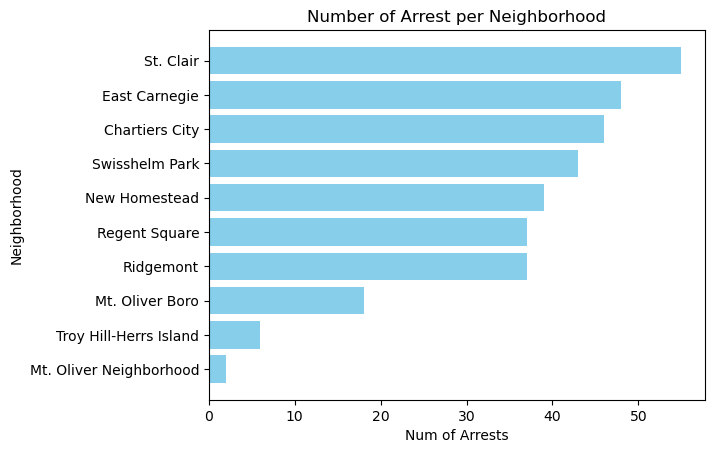

In [15]:
categories = ['Mt. Oliver Neighborhood', 'Troy Hill-Herrs Island', 'Mt. Oliver Boro', 'Ridgemont','Regent Square', 'New Homestead', 'Swisshelm Park', 'Chartiers City','East Carnegie', 'St. Clair']
values = [2, 6, 18, 37, 37, 39, 43, 46,48, 55]


plt.barh(categories, values, color='skyblue')
plt.title('Number of Arrest per Neighborhood')
plt.xlabel('Num of Arrests')
plt.ylabel('Neighborhood')
plt.show()

Continuing with the bar graphs. This is a breakdown of all the neighborhood with the highest arrest rate.

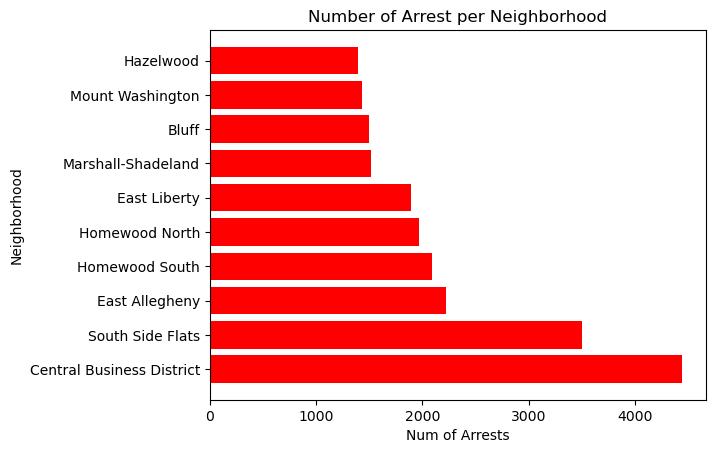

In [17]:
categories = ['Central Business District', 'South Side Flats', 'East Allegheny', 'Homewood South','Homewood North', 'East Liberty', 'Marshall-Shadeland', 'Bluff','Mount Washington', 'Hazelwood']
values = [4440, 3497, 2217, 2090, 1969, 1889, 1516, 1502, 1434, 1396]


plt.barh(categories, values, color='red')
plt.title('Number of Arrest per Neighborhood')
plt.xlabel('Num of Arrests')
plt.ylabel('Neighborhood')
plt.show()

***The Winners***
1. Mt. Oliver Neighborhood - 2
2. Troy Hill-Herrs Island - 6
3. Mt. Oliver Boro - 18

***The Losers***
1. Central Business District - 4440
2. South Side Flats - 3497
3. East Allegheny - 2217



________CONCLUSION________

The area with the lowest arrests is Mt. Oliver Neighborhood. Coming in with the shockingly low number of 2 arrests. While the biggest loser was the Central Business District with 4440 arrests. The dataset was quite surprising, I found that most neighborhoods were in the triple digits with the worst making it into the four digits. It would be very interesting to compare the arrests to the crimes that happened in the neighborhood to see the severity of the crime that happens in the neighborhood. Looking over the data set with knowledge of the neighborhoods. I was quite surprised with some neighborhoods. East Liberty was lower than I expected while it still made the top ten. Squirrel hill North and South were higher than I expected as well both being high in the triple ranges.
